# Deteksi kemungkinan berita Valid dan tidak valid di media sosial
Nama : Uly Atmi Azizah

NIM : A11.2022.14736


## Ringkasan dan Permasalahan
### Permasalahan
Berita palsu menjadi ancaman serius di era informasi digital. Penyebaran berita palsu dapat menyebabkan disinformasi, kerugian sosial, dan konflik. Oleh karena itu, diperlukan sebuah sistem otomatis untuk mendeteksi berita palsu berdasarkan konten teksnya. Dengan beredarnya informasi hoax yang semakin banyak, masyarakat membutuhkan alat untuk mengenali informasi yang benar dan dapat dipercaya. Hal ini penting karena berita palsu dapat memengaruhi opini publik dan keputusan sosial.

### Tujuan
Proyek ini bertujuan untuk mengembangkan sistem deteksi berita tidak valid yang dapat digunakan untuk menganalisa kemungkinan informasi yang beredar di media sosial menggunakan teknik pemrosesan teks dan algoritma machine learning.

### Alur Penyelesaian
Berikut adalah bagan alur penyelesaian proyek ini:
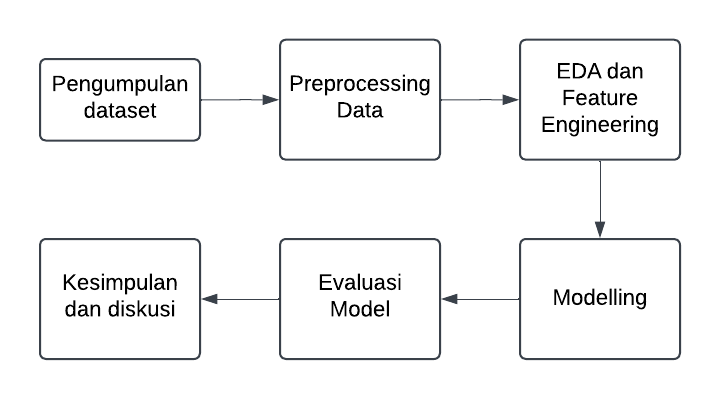
1. **Pengumpulan Dataset**: Dataset yang digunakan diperoleh dari Kaggle. Menggunakan 2 file dataset yaitu file yang berisi data valid dan tidak valid.
2.  **Preprocessing Data**: Membersihkan tek dan  menormalisasi data
3.  **Feature Engineering**: Menggunakan TF-IDF untuk representasi teks
4.  **Modeling**: Membangun dan melatih model menggunakan Logistic Regression, Decision Tree, Gradient Boosting, dan Random Forest
5.  **Evaluasi Model**: Menggunakan metrik akurasi, precision, recall, dan F1-scor untuk menilai performa model..




In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Penjelasan Dataset
Dataset yang digunakan berisi kumpulan berita yang dikategorikan sebagai berita palsu dan berita valid.
Dataset terdiri dari dua file:
1. `tidakvalid.csv`: Berisi berita yang diklasifikasikan sebagai berita tidak valid.
2. `beritavalid2.csv`: Berisi berita yang diklasifikasikan sebagai berita valid.

Atribut : 
1. Judul. Berisi judul berita.
2. Isi Berita. Isi berita mencakup konten lengkap dari artikel yang bersangkutan. Isi berita menjadi elemen utama yang akan dianalisis untuk mendeteksi pola, penggunaan bahasa, dan keakuratan informasi.
3. Label. Label menunjukkan klasifikasi dari setiap berita, yang terbagi menjadi dua jenis, yaitu berita valid dan berita tidak valid. n berita.


### Struktur Dataset
Kolom:
- **narasi**: Teks berita.
- **label**: Target klsifi0 = Buktidak Validrita Palsu, 1Valid.ta Palsu).

### EDA dan Proses Features Dataset
1. Distribusi data antara berita palsu dan bukan berita palsu divisualisasikan untuk memastikan data seimbang.
2. Preprocessing dilakukan dengan langkah:
   - Lowercasing: Mengubah teks menjadi huruf kecil.
   - Menghapus , karakter khusustanda baca dan angka.
   - Menghapus spasi berlebih.
3. Representasi teks menggunakan TF-IDF dengan maksimal 5000 fitur.

---

In [92]:
data_tidakvalid = pd.read_csv("tidakvalid.csv")
data_valid = pd.read_csv("beritavalid2.csv")

In [94]:
data_tidakvalid.head()

,judul,narasi,label
0,Pemerintah Menggratiskan Listrik Seluruh Indon...,"Dalam pengumuman yang mengejutkan, pemerintah ...",Berita Palsu
1,NASA Umumkan Penemuan Kehidupan di Mars Setela...,"Berita yang menghebohkan dunia sains, NASA dik...",Berita Palsu
2,Hewan Peliharaan Anda Diam-Diam Memata-Matai A...,Sebuah teori baru menyebutkan bahwa hewan peli...,Berita Palsu
3,Kejadian Aneh: Sungai di Sumatera Berubah Menj...,Penduduk setempat melaporkan fenomena luar bia...,Berita Palsu
4,Kimia Farma Bagikan Hadiah Uang Tunai Rp 2 Jut...,Pesan berantai di media sosial menyebutkan bah...,Berita Palsu


In [96]:
data_valid.head(5)

,judul,narasi,label
0,Penutupan Sementara Masjid Al Jabbar Diperpanj...,Pemerintah Daerah Jawa Barat memperpanjang p...,Berita Valid
1,"Gempa M 4,4 Guncang Jailolo, Maluku Utara","Gempa bumi bermagnitudo 4,4 mengguncang Jail...",Berita Valid
2,"KPK Sita Rp5,6 Miliar dari Eks Bupati Sidoarjo...",Komisi Pemberantasan Korupsi (KPK) menyita u...,Berita Valid
3,Ketua RW Plumpang Bantah Ada Pipa Pertamina Me...,"Ketua RW 09 Kelurahan Rawa Badak Selatan, Ko...",Berita Valid
4,Transaksi Janggal Rp300 Triliun di Kemenkeu Ve...,"Menteri Koordinator Bidang Politik, Hukum, d...",Berita Valid


In [98]:
data_tidakvalid["class"] = 0
data_valid["class"] = 1

In [100]:
data_tidakvalid.shape, data_valid.shape

((2143, 4), (2328, 4))

In [102]:
# Menghapus 10 baris terakhir untuk pengujian manual dan membuat salinan
data_tidakvalid_manual_testing = data_tidakvalid.tail(10).copy()
for i in range(4, 7, -1):
    data_tidakvalid.drop([i], axis=0, inplace=True)

data_valid_manual_testing = data_valid.tail(10).copy()
for i in range(73, 76, -1):
    data_valid.drop([i], axis=0, inplace=True)

# Menetapkan kolom class
data_tidakvalid_manual_testing["class"] = 0
data_valid_manual_testing["class"] = 1


In [104]:
data_tidakvalid.shape, data_valid.shape

((2143, 4), (2328, 4))

In [106]:
data_tidakvalid_manual_testing["class"] = 0
data_valid_manual_testing["class"] = 1

In [108]:
data_tidakvalid_manual_testing.head(10)

,judul,narasi,label,class
2133,Tiba tiba jadi spt....mau ngemis suara muslim....,Tiba tiba jadi spt….mau ngemis suara muslim….g...,Berita Palsu,0
2134,Foto Massa Sudah Tumpah Ruah Mengepung Gedung ...,Semoga RUU HIP atau diganti dengan nama apapun...,Berita Palsu,0
2135,Racun Dari Nasi di Magic Com,Keluarkan nasi dari rice cooker kalau sdh mata...,Berita Palsu,0
2136,Lindungilah Saudara Muslim Kami di Rohingya da...,Jika anda Islam komen aamiin.. �Ya Allah lindu...,Berita Palsu,0
2137,Foto Beserta Video Pesawat Tempur dan Rudal Is...,Foto Beserta Video Pesawat Tempur dan Rudal Is...,Berita Palsu,0
2138,"Dijemput oleh Tim Medis, Kakak Beradik Usia 8 ...","DiTangerang, dua bersaudara kakak beradik usia...",Berita Palsu,0
2139,": Pertanda Alam, Kera Putih Mulai Turun Dari G...","Pertanda Alam, Kera Putih Mulai Turun Dari Gun...",Berita Palsu,0
2140,Pasar Wameo dan Karya Nugraha di Tutup selama ...,Assalamu Alaikum …\n \n Info dari pedagang pa...,Berita Palsu,0
2141,Klarifikasi KPK Terkait Foto Setya Novanto Tan...,Secara tidak sengaja sekitar pukul 06.00 WIB d...,Berita Palsu,0
2142,Erdogan Tidak Pernah Akui Kemenangan Jokowi,Artikel dalam laman daring aljazera.online ber...,Berita Palsu,0


In [110]:
data_valid_manual_testing.head(10)

,judul,narasi,label,class
2318,"Sejak Indonesia Merdeka, Baru Gubernur Anies y...","Sejak Indonesia merdeka hingga sekarang, baru ...",Berita Valid,1
2319,"Apabila ada masyarakat tidak mampu makan, dapa...",Apabila ada masyarakat Indonesia yang tidak ma...,Berita Valid,1
2320,Inilah Akibat Memilih Komisaris Kafir,Inilah akibat memilih komisaris kafir. Budaya ...,Berita Valid,1
2321,Dermaga Bemata Dajjal Hancur Diterpa Gempa Ser...,Tanpa kita sadari ternyata di sulawesi barat (...,Berita Valid,1
2322,: Jembatan Widang Babat di Tuban yang Menjadi ...,INIKAH INFRASTRUKTUR YG KEJAR TAYANG BUAT 2019...,Berita Valid,1
2323,Jokowi Siapkan Perpres Demi Permudah Tenaga Ke...,JOKOWI SIAPKAN PERPRES DEMI PERMUDAH TENAGA KE...,Berita Valid,1
2324,Lucifer Church Colombia,RUMAH IBADAH PENYEMBAH IBLIS LUCIFER TELAH DI ...,Berita Valid,1
2325,Kepolisian Republik Indonesia Memberikan Tips ...,Kepolisian Republik Indonesia Memberikan Tips ...,Berita Valid,1
2326,Muslim Indonesia di Amerika Mendukung Aksi Dam...,Muslim Indonesia di Amerika Mendukung Aksi Dam...,Berita Valid,1
2327,Kanada Sudah Terbebas dari Covid-19,CANADA is now Covid free! i hope philippines n...,Berita Valid,1


In [112]:
data_manual_testing = pd.concat([data_tidakvalid_manual_testing, data_valid_manual_testing], axis = 0)
data_manual_testing.to_csv("manual_testing.csv")

In [114]:
data_merge = pd.concat([data_tidakvalid, data_valid], axis =0 )
data_merge.head(10)

,judul,narasi,label,class
0,Pemerintah Menggratiskan Listrik Seluruh Indon...,"Dalam pengumuman yang mengejutkan, pemerintah ...",Berita Palsu,0
1,NASA Umumkan Penemuan Kehidupan di Mars Setela...,"Berita yang menghebohkan dunia sains, NASA dik...",Berita Palsu,0
2,Hewan Peliharaan Anda Diam-Diam Memata-Matai A...,Sebuah teori baru menyebutkan bahwa hewan peli...,Berita Palsu,0
3,Kejadian Aneh: Sungai di Sumatera Berubah Menj...,Penduduk setempat melaporkan fenomena luar bia...,Berita Palsu,0
4,Kimia Farma Bagikan Hadiah Uang Tunai Rp 2 Jut...,Pesan berantai di media sosial menyebutkan bah...,Berita Palsu,0
5,Air Minum Dalam Kemasan Ternyata Mengandung Za...,"Menurut laporan tidak resmi, air minum dalam k...",Berita Palsu,0
6,Restoran Ini Menawarkan Makanan Gratis Tapi Ad...,Sebuah restoran di Jakarta dikabarkan memberik...,Berita Palsu,0
7,Vaksin COVID-19 Mengandung Microchip untuk Men...,Teori konspirasi yang kembali mencuat menyatak...,Berita Palsu,0
8,Ilmuwan Temukan Formula Obat yang Membuat Manu...,"Dalam klaim yang kontroversial, sekelompok ilm...",Berita Palsu,0
9,Organisasi Rahasia Akan Mengontrol Dunia denga...,Kabar tentang organisasi rahasia yang akan men...,Berita Palsu,0


In [116]:
data_merge.columns

Index(['judul', 'narasi', 'label', 'class'], dtype='object')

In [118]:
data = data_merge.drop(["judul", "label"], axis = 1)

In [120]:
data.isnull().sum()

narasi    0
class     0
dtype: int64

In [122]:
data = data.sample(frac = 1)

In [124]:
data.head()

,narasi,class
1314,“Firing squads kill 4 convicts”,1
2011,"Kapolres Deliserdang, AKBP Eddy Suryantha Tari...",0
1383,Tak sempat di tepis…!!! Ratusan rudal Au5tr4al...,0
556,"FITNAH INI MENGGELIKAN, TAPI TIDAK BISA DIDIAM...",0
1650,"Video yang harus ditonton, situasi sebenarnya ...",1


In [126]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

In [128]:
data.columns

Index(['narasi', 'class'], dtype='object')

In [130]:
data.head()

,narasi,class
0,“Firing squads kill 4 convicts”,1
1,"Kapolres Deliserdang, AKBP Eddy Suryantha Tari...",0
2,Tak sempat di tepis…!!! Ratusan rudal Au5tr4al...,0
3,"FITNAH INI MENGGELIKAN, TAPI TIDAK BISA DIDIAM...",0
4,"Video yang harus ditonton, situasi sebenarnya ...",1


In [132]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Menghapus teks dalam kurung siku
    text = re.sub(r'\s+', ' ', text)  # Mengganti spasi berlebih dengan satu spasi
    text = re.sub(r'https?://\S+', '', text)  # Menghapus URL
    text = re.sub(r'\*+', '', text)  # Menghapus tanda bintang
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Menghapus tanda baca
    text = re.sub(r'\n', '', text)  # Menghapus karakter baris baru
    text = re.sub(r'\w*\d\w*', '', text)  # Menghapus kata dengan angka
    return text


In [134]:
print(data.columns)
data["narasi"] = data["narasi"].apply(wordopt)

Index(['narasi', 'class'], dtype='object')


In [136]:
x = data["narasi"]
y = data["class"]

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Proses Learning / Modeling
### Algoritma yang Digunakan
1. Logistic Regression
2. Decision Tree
3. Gradient Boosting Classifier
4. Random Forest Classifier

**Langkah-langkah Modeling:**
1. Membagi dataset menjadi training set dan testing set.
2. Melatih model dengan data training.
3. Menguji performa model menggunakan data testing.

### Implementasi
Setiap algoritma dilatih menggunakan data yang telah di-preprocessing. Proses validasi dilakukan menggunakan k-fold cross-validation untuk memastikan generalisasi model.

---

In [142]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [144]:
pred_lr=LR.predict(xv_test)

In [146]:
LR.score(xv_test, y_test)

0.667262969588551

## Performa Model
Berikut adalah metrik evaluasi yang digunakan:
- **Akurasi**: Proporsi prediksi yang benar.
- **Precision**: Ketepatan model dalam memprediksi berita palsu.
- **Recall**: Kemampuan model menangkap semua berita palsu.
- **F1-score**: Harmonik rata-rata precision dan recall.


In [148]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       515
           1       0.69      0.70      0.70       603

    accuracy                           0.67      1118
   macro avg       0.66      0.66      0.66      1118
weighted avg       0.67      0.67      0.67      1118



In [150]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [152]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.5697674418604651

In [154]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       515
           1       0.61      0.57      0.59       603

    accuracy                           0.57      1118
   macro avg       0.57      0.57      0.57      1118
weighted avg       0.57      0.57      0.57      1118



In [156]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [157]:
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.6198568872987478

In [160]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       515
           1       0.68      0.55      0.61       603

    accuracy                           0.62      1118
   macro avg       0.63      0.63      0.62      1118
weighted avg       0.63      0.62      0.62      1118



In [162]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [163]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.6457960644007156

In [166]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       515
           1       0.68      0.65      0.66       603

    accuracy                           0.65      1118
   macro avg       0.64      0.65      0.64      1118
weighted avg       0.65      0.65      0.65      1118



In [168]:
def output_lable(n):
    if n == 0:
        return "Berita Tidak Valid"
    elif n == 1:
        return "Berita Valid"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [170]:
news = str(input())
manual_testing(news)

 Pemberitaan media di Malaysia menyebutkan bahwa asap tebal yang tengah mengepung negara mereka berasal dari Indonesia. Menanggapi hal tersebut, pihak Pemerintah Indonesia memberikan bantahannya. Badan Metereologi Klimatologi dan Geofisika (BMKG) membantah asap yang menyelimuti wilayah Sarawak, Malaysia, berasal dari kebakaran hutan dan lahan di Indonesia. Asap yang muncul di wilayah tersebut diduga berasal dari local hotspot.




LR Prediction: Berita Valid 
DT Prediction: Berita Tidak Valid 
GBC Prediction: Berita Tidak Valid 
RFC Prediction: Berita Tidak Valid


In [172]:
news = str(input())
manual_testing(news)

 Penyebar Hoaks dan Penghina Prabowo dan Habib Rizieq Dibekuk




LR Prediction: Berita Tidak Valid 
DT Prediction: Berita Tidak Valid 
GBC Prediction: Berita Tidak Valid 
RFC Prediction: Berita Tidak Valid


In [176]:
news = str(input())
manual_testing(news)

 Menteri Koordinator bidang Hukum, Hak Asasi Manusia (HAM), Imigrasi dan Pemasyarakatan Yusril Ihza Mahendra mengatakan pemerintah menghormati putusan Mahkamah Konstitusi (MK) yang menghapus persentase pengusulan pasangan calon presiden dan wakil presiden (presidential threshold). MK menyatakan Pasal 222 Undang-undang Nomor 7 Tahun 2017 tentang Pemilihan Umum (UU Pemilu) bertentangan dengan konstitusi.  "Sesuai ketentuan Pasal 24C UUD 45, putusan MK adalah putusan pertama dan terakhir yang bersifat final dan mengikat (final and binding)," kata Yusril melalui keterangan tertulis, Jumat (3/1). Ia menegaskan semua pihak termasuk pemerintah terikat dengan putusan MK tanpa dapat melakukan upaya hukum apa pun. Pemerintah, kata dia, menyadari permohonan untuk menguji ketentuan Pasal 222 UU Pemilu telah dilakukan lebih dari 30 kali, dan baru pada pengujian terakhir dikabulkan.  Pemerintah, lanjut Yusril, melihat ada perubahan sikap MK terhadap konstitusionalitas norma Pasal 222 UU Pemilu diban



LR Prediction: Berita Valid 
DT Prediction: Berita Tidak Valid 
GBC Prediction: Berita Valid 
RFC Prediction: Berita Valid


## Diskusi Hasil dan Kesimpulan
### Diskusi Hasil
1. **Logistic Regression** menunjukkan performa terbaik dengan F1-score 0.67.
2. Gradient Boosting memberikan hasil mendekati Logistic Regression.
3. Decision Tree dan Random Forest memiliki performa yang kompetitif tetapi sedikit di bawah Gradient Boosting.

### Kesimpulan
1. Sistem pendeteksi berita palsu berhasil dibangun dengan akurasi yang cukup memadai.
2. Logistic Regression adalah algoritma terbaik untuk kasus ini.
3. Model ini dapat digunakan sebagai alat bantu untuk mencegah penyebaran berita palsu di platform digital.

### Saran Pengembangan
1. Tambahkan lebih banyak dataset dari berbagai sumber untuk meningkatkan generalisasi model.
2. Gunakan representasi teks yang lebih kompreks dan canggih.
3. Bangun antarmuka pengguna (GUI) untuk mempermudah pengguna non-teknis dalam menggunakan model ini.